<a href="https://colab.research.google.com/github/Asem1992/ME5920_HW1_Asem/blob/main/ME5920_HW1_Asem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME5920 - Homework 1
**Name:** Asem Malkawi  
**Repo:** ME5920_HW1_Asem  

## 2.1 Images (MNIST)
## 2.2 Time Series (energydata_complete.csv)
## 2.3 Multi-variate (airfoil_self_noise.dat)
## 3.1 Image pre-processing (Leaf images + patches + ZCA whitening)
## 3.2 Image segmentation (36 soybean subplots)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset

print("Torch:", torch.__version__)


Torch: 2.9.0+cpu


In [3]:
!pip -q install einops


In [4]:
from einops import rearrange
print("einops ready ✅")


einops ready ✅


In [5]:
mnist = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

N = 1000
idx = np.random.choice(len(mnist), size=N, replace=False)
subset = Subset(mnist, idx)

images = torch.stack([subset[i][0] for i in range(N)])  # [1000, 1, 28, 28]
labels = torch.tensor([subset[i][1] for i in range(N)]) # [1000]

print("images:", images.shape)
print("labels:", labels.shape)
print("first 10 labels:", labels[:10].tolist())


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.08MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 158kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.2MB/s]


images: torch.Size([1000, 1, 28, 28])
labels: torch.Size([1000])
first 10 labels: [3, 6, 6, 6, 0, 3, 6, 2, 5, 6]


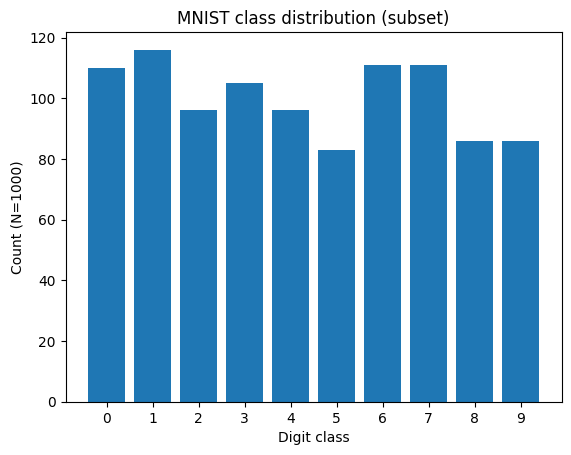

Counts: [110 116  96 105  96  83 111 111  86  86]


In [6]:
counts = torch.bincount(labels, minlength=10).numpy()

plt.figure()
plt.bar(range(10), counts)
plt.xticks(range(10))
plt.xlabel("Digit class")
plt.ylabel("Count (N=1000)")
plt.title("MNIST class distribution (subset)")
plt.show()

print("Counts:", counts)


In [7]:
batched = rearrange(images, "(b n) c h w -> b n c h w", n=25)
print("batched:", batched.shape)


batched: torch.Size([40, 25, 1, 28, 28])


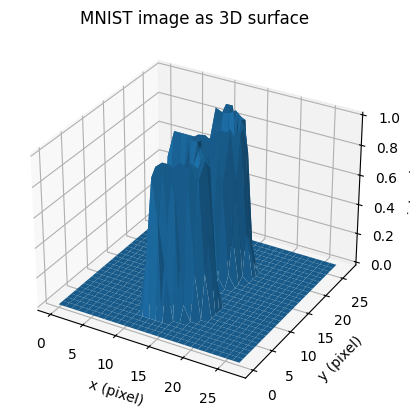

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # noqa

img = images[0, 0].numpy()  # [28, 28]

x = np.arange(img.shape[1])
y = np.arange(img.shape[0])
X, Y = np.meshgrid(x, y)
Z = img

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z)
ax.set_title("MNIST image as 3D surface")
ax.set_xlabel("x (pixel)")
ax.set_ylabel("y (pixel)")
ax.set_zlabel("intensity")
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)

print("Setup OK ✅")


Setup OK ✅


In [9]:
print("images:", images.shape)   # should be [1000, 1, 28, 28]
print("labels:", labels.shape)   # should be [1000]

batched = rearrange(images, "(b n) c h w -> b n c h w", n=25)
print("batched:", batched.shape) # should be [40, 25, 1, 28, 28]


images: torch.Size([1000, 1, 28, 28])
labels: torch.Size([1000])
batched: torch.Size([40, 25, 1, 28, 28])
